# 비지도학습(Unsupervised Learning)에 대하여

In [5]:
from IPython.display import Image


#### 비지도학습(Unsupervised learning)이란, 

- 지도학습과 달리 training data로 정답(label)이 없는 데이터가 주어지는 학습방법을 말합니다.

- 비지도학습은 주어진 데이터가 어떻게 구성되어 있는지 스스로 알아내는 방법이라고도 말할 수 있습니다. 아무도 정답을 알려주지 않은 채 오로지 데이터셋의 특징(feature) 및 패턴을 기반으로 모델 스스로가 판단하는 것이니까요.


![title](https://d3s0tskafalll9.cloudfront.net/media/images/f-44.1.max-800x600.png)

이렇게 몯느 데이터셋에 각각에 대한 정보가 명시되어 있으면 참 좋겠지만 ,그렇지 않을 경우가 대부분일뿐더러 라벨링이 되어 있는 데이터셋을 마련하기 위해서는 적지 않은 인적 자원이 소모됩니다.

결국 어떤 이미지가 고양이 사진이다, 강아지 사진이다라는 정답을 매기는 과정은 이간이 수행해야 하기 때문입니다.

이 문제를 해결하기 위해, 라벨링이 되어 있지 않은 데이터들 내에서 비슷한 특징이나 패턴을 가진 데이터들끼리 군집화한 후, 새로운 데이터가 어떤 군집에 속하는지를 추론하는 비지도학습과 같은 방법론이 제시되었어요.

비지도학습의 대표적인 예시로는 군집화(클러스터링, clustering) 가 있지만, 비지도학습이라는 용어는 정답이 없는 데이터를 이용한 학습 전체를 포괄하는 용어이기 때문에 클러스터링 외에도 차원 축소(dimensionality reduction) 및 이를 이용한 데이터 시각화, 생성 모델(generative model) 등 다양한 task를 포괄하는 개념입니다.

러스터링의 대표적인 알고리즘인 K-means와 DBSCAN 알고리즘, 차원 축소의 대표적인 방법인 PCA(Principal Component Analysis), T-SNE에 대해서 알아보도록 하겠습니다. 

#### 클러스터링(1) K-means

지도학습 상황과 달리, 비지도학습이 필요한 상황에서는 지도학습 때 당연히 주어지던 몇 가지가 생략되어 있습니다. 

선은 데이터 X가 무엇인지에 대한 정답(label) y가 없습니다. 또 없는 게 있다면, y가 될 수 있는 분류 기준(클래스 또는 카테고리)도 없다고 할 수 있겠네요.

#### 군집화(클러스터링)이란

- 그렇게 명확한 분류 기준이 없는 상황에서도 데이터들을 분석하여 가까운(또는 유사한) 것들끼리 묶어 주는 작업입니다. 

이를 통해서 개별적인 데이터들을 몇 개의 그룹으로 추상화하여 새로운 의미를 발견해 나갈 수 있게 되겠습니다.

그런데 명확한 분류 기준이 없다면 무엇을 기준으로 묶어낼 수 있을까요?

가장 쉽게 생각해 볼 수 있는 방법은 임의로 k개의 그룹으로 뭉쳐 보라고 하는 것이겠군요.

단 아무렇게나 뭉치진 말고 k개의 기준점을 중심으로 가장 가까운 데이터들을 뭉쳐 보는 방식으로요.

k_means알고리즘은 k 값이 주어져 있을 떄, 주어진 데이터들을 k 개의 클러스터로 묶는 알고리즘으로 대표적인 크러스터링 기법 중 하나입니다.

밑에 코드를 통해 K-means알고리즘이 어떻게 동작하는지 보겠습니다.

In [6]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


비지도학습에는 label이 없다고 했었는데 위 코드에는 label이 등장하네요? 그렇습니다. 임의로 지정한 k개의 중심점이 새로운 label 역할을 하는 것이 K-means 의 아이디어입니다.

그리고 좌표를 그려보겠습니다.

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


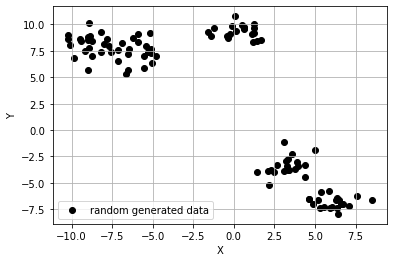

In [7]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

위와 같이 scikit-learn의 make_blob()을 활용하여 중심점이 5개인 무작위의 점 데이터 100개를 생성해 보았습니다.

한눈에 보기에도 위의 데이터들은 5개의 군집을 이루고 있는 것처럼 보이는데요, 과연 k-means 알고리즘을 적용하여 위 데이터들을 올바르게 군집화할 수 있는지 알아보겠습니다.

#### 생성한 데이터에 K-means 알고리즘 적용


이제 K-means 알고리즘을 적용해 봅시다. 그런데, 데이터들끼리의 거리를 어떻게 측정하는 걸까요?

실은 우리는 위에서 자연스럽게 데이터를 X-Y 좌표축 위에 생성했습니다. 

좌표축 위에 존재하는 데이터들 사이의 거리는 쉽게 계산해 낼 수 있죠? 피타고라스 정리를 응용하여 계산한 좌표축 사이의 두 점 사이의 직선거리를 유클리드 거리(Eucledian distance) 또는 L2 Distance라고 부릅니다. 

자세한 설명은 아래 링크를 참고해 주세요.

링크 : http://egloos.zum.com/metashower/v/9957577

※ 유클리디안 거리


- 유클리드라는 수학자가 고안해낸 이론이다.

- 최대공약수를 계산하는 유클리드 호제법으로 유명한 분이다.

- 유클리디안 거리의 다른이름으로 L2 Distance 라고도 한다.

2차원 평면에 두점이 ( x1, y1 ) 과 ( x2, y2 )로 표현되어있다고 가정한다면, 실제 이 두점간의 거리는 피타고라스 정리를 이용하여
쉽게 구할수 있다. 이것을 3차원 4차원 등등 다차원지 확장시킨것이 유클리디안 거리라고 생각하면 되겠다.

예를 들어 n 차원에 있는 두점 P와 Q가 있다고 생각하자
P =  ( p1, p2, p3, p4 ,,,, pn )
Q = ( q1, q2, q3, q4 ,,,, qn )
이 두점간의 거리를 유클리디안 거리로 표현한다면 아래 처럼 표현할수 있다. 


![title](http://pds26.egloos.com/pds/201710/27/79/a0274579_59f2a5ad7d701.png)

** 추가적으로 유클리디안 거리 공식으로 계싼을 하면 거리의 최대값이라는 게 없어서 뭔가와 비교할 수가 없다.
그래서 이 거리를 0 ~ 1 사이의 값으로 갖도록 정규화? 하는 방법을 아래와 같이 사용하기도 한다.

유클리디안 거리 공식을 이용해 얻은 거리의 값을   Ed 라고 한다면



이렇게 표현한다면  가장 가까운 경에는 1에 가까울 것이고 멀수록 0에 가까운 값을 갖게 된다.

전체적인 K-mean 알고리즘의 순서는 다음과 같이 구성됩니다.

1. 원하는 클러스터의 수(K)를 결정합니다.


2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정합니다. 이들은 각각의 클러스터를 대표합니다.


3. 나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다.


4. 각 K개의 클러스터의 중심점을 재조정합니다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.(이  중심점은 실제로 존재하는 데이터가 아니어도 상관없습니다.)


5. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다.


6. 4번과 5.번을 반복 수행합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더 이상 바뀌지 않음)하게 됩니다.

In [8]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


K-means 결과를 시각화해서 확인해 보겠습니다.

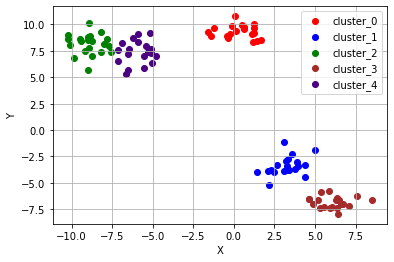

In [9]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

처음에 우리가 중심점 5개인 무작위 데이터를 생성하고 나서, 이를 K-means 알고리즘을 활용해 5개의 군집으로 분류한 결과가 위와 같습니다.

그런데 사실, K-means 알고리즘이 항상 만능열쇠는 아닙니다. 주어진 데이터의 분포에 따라 우리가 의도하지 않은 결과를 초래할 수 있어요.

#### K-means 알고리즘이 잘 동작하지 않는 예시들

다음 코드를 통해 어떤 특성의 데이터들이 K-means 알고리즘을 적용하였을 때 잘 군집화되지 않는지 살펴보도록 하겠습니다.

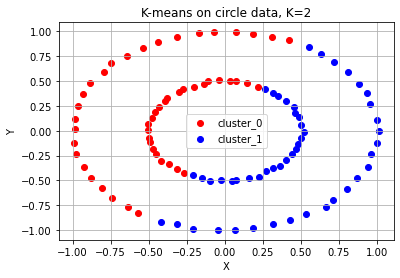

In [10]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

첫 번째 원형으로 분포되어 있는 데이터 같은 경우는 아마 대부분의 사람들이 '가운데 작은 원'과 '바깥쪽 큰 원' 두 개의 군집으로 분류하기를 원했을 거예요. 하지만 K-means 알고리즘은 이 데이터들을 마치 케잌을 칼로 자르듯이 반으로 나눴네요.

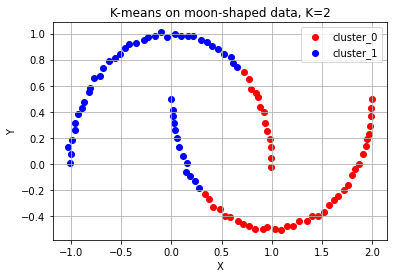

In [11]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

두 번째 초승달 모양의 데이터도 마찬가지예요. 두 개의 달 형태를 분리해서 군집화하지 않고, 이 역시 y축에 대하여 칼로 자른 형태의 느낌으로 두 개의 군집을 나눴네요.